In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.svm import SVC

In [36]:
thePoints = -10.0 + 20*np.random.rand(800, 2)
sumOfSquares = np.sum(thePoints**2,1)
theOutcome = np.where(sumOfSquares<=50, 0, 1)

df = pd.DataFrame(thePoints, columns = ['Test 1', 'Test 2'])

df.insert(2, 'Sum of Squares', sumOfSquares)
df.insert(3, 'Outcome', theOutcome)

100.0*np.sum(df['Outcome'])/np.shape(df['Outcome'])[0]

61.625

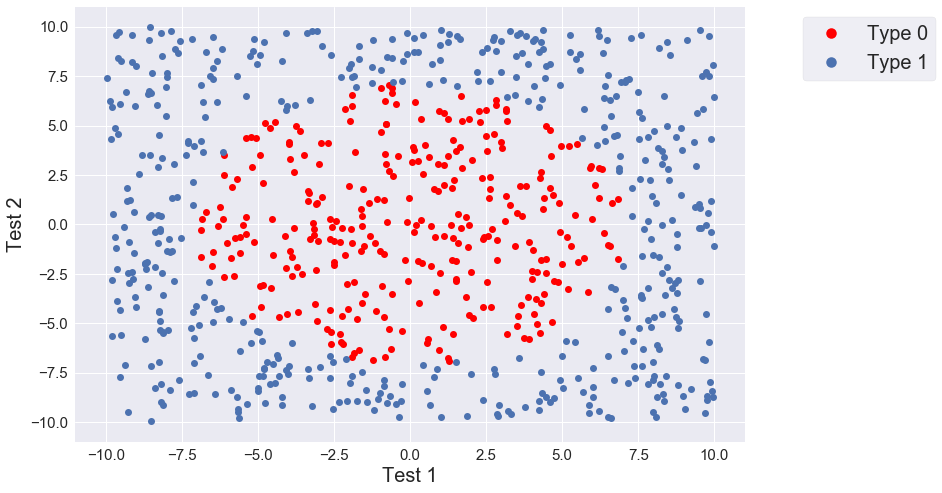

In [37]:
df0 = df[df['Outcome']==0]
df1 = df[df['Outcome']==1]

plt.figure(figsize=(12,8))
plt.plot(df0['Test 1'], df0['Test 2'], 'ro')
plt.plot(df1['Test 1'], df1['Test 2'], 'o')
plt.xlabel('Test 1', fontsize=20)
plt.xticks(fontsize=15)
plt.xlim(-11,11)
plt.ylabel('Test 2', fontsize=20)
plt.yticks(fontsize=15)
plt.ylim(-11,11)
plt.legend(['Type 0', 'Type 1'], loc=1, fontsize=20, markerscale=1.5, frameon=True, bbox_to_anchor=(1.3, 1))
plt.show()

In [38]:
theModel = SVC()
theModel.fit(df[['Test 1', 'Test 2']], df['Outcome']);

print 'Training Set Accuracy Score: ', 100.0*sum(theModel.predict(df[['Test 1', 'Test 2']]) == theOutcome)/np.shape(theOutcome)[0]

Training Set Accuracy Score:  99.625


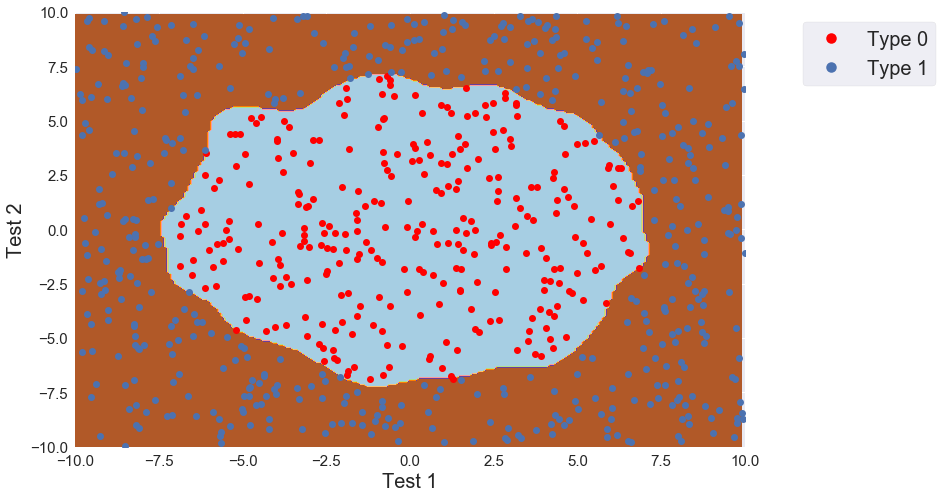

In [39]:
# Plot the decision boundary

plot_step = 0.1 # grid size

# extents of the plot
x_min = -10
x_max = 10
y_min = -10
y_max = 10

# generate the coordinates of the grid points
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

# unroll and concatenate the coordinates of the grid, predict on them, then reshape the results
Z = theModel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the contours
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# ===========================================================================

df0 = df[df['Outcome']==0]
df1 = df[df['Outcome']==1]

plt.plot(df0['Test 1'], df0['Test 2'], 'ro')
plt.plot(df1['Test 1'], df1['Test 2'], 'o')
plt.xlabel('Test 1', fontsize=20)
plt.xticks(fontsize=15)
plt.xlim(x_min,x_max)
plt.ylabel('Test 2', fontsize=20)
plt.yticks(fontsize=15)
plt.ylim(y_min,y_max)
plt.legend(['Type 0', 'Type 1'], loc=1, fontsize=20, markerscale=1.5, frameon=True, bbox_to_anchor=(1.3, 1))
plt.show()